MLSP Coding: Supervised Learning
---

Let's start wit Iris Flower Data.

- Multiple classes: multiple types of flowers.
- Multiple features: Multiple properties of the flowers, e.g. sepal length, width, etc. Multivariate.

|Aspect|Quantity|
|---|---|
|Classes| 3|
|Samples per class| 50|
|Samples total| 150|
|Dimensionality| 4|
|Features| real, positive|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

data = datasets.load_iris()

print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


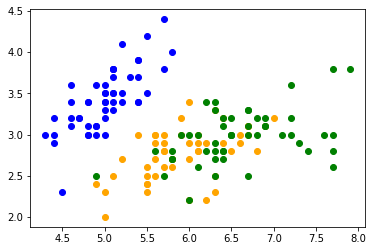

In [4]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)
plt.scatter(iris_X[iris_y==0,0], iris_X[iris_y==0,1], color='blue')
plt.scatter(iris_X[iris_y==1,0], iris_X[iris_y==1,1], color='orange')
plt.scatter(iris_X[iris_y==2,0], iris_X[iris_y==2,1], color='green')

Let's separate into training and test.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_X[:100,:2],
    iris_y[:100],
    test_size=.20,
    random_state=42
)
print(y_test)
print(X_train.shape)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
(80, 2)


Summon Linear Regression and fit the data.

In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print(regr.coef_)
print(regr.intercept_)

[ 0.48376699 -0.59027124]
-0.30733080405545044


Predict the labels of test data.

In [9]:
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.03


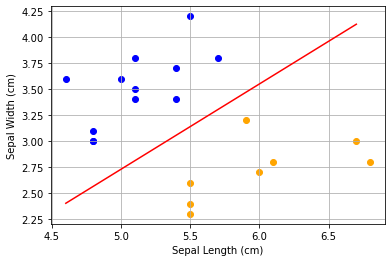

In [11]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='blue')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='orange')

slope = -regr.coef_[0]/regr.coef_[1] # x_2*a_2 + x_1*a_1 + b = 0.5 => 
                                     # x_2 = -(a_1/a_2)*x_1 - (b-0.5)/a_2
intercept = -(regr.intercept_-0.5)/regr.coef_[1]
regr_line_x = np.arange(X_test[:,0].min(), X_test[:,0].max(), 0.1)
regr_line_y = regr_line_x*slope+intercept
plt.plot(regr_line_x, regr_line_y, color='red')
plt.grid()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

Now, let's use all classes.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_X[:,:2],
    iris_y,
    test_size=.20,
    random_state=42
)
print(y_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print(regr.coef_)
print(regr.intercept_)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[ 0.71666836 -0.66508081]
-1.1353235270263542


Mean squared error: 0.17


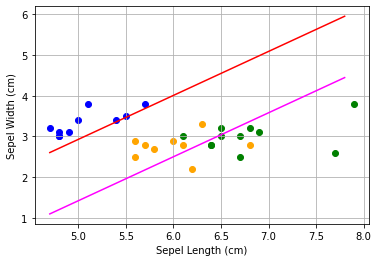

In [13]:
y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='blue')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='orange')
plt.scatter(X_test[y_test==2,0], X_test[y_test==2,1], color='green')

slope = -regr.coef_[0]/regr.coef_[1] # y*a_2 + x*a_1 + b = 0.5 => 
                                     # y = -(a_1/a_2)*x - (b-0.5)/a_2
intercept = -(regr.intercept_-0.5)/regr.coef_[1]
intercept_2 = -(regr.intercept_-1.5)/regr.coef_[1]
regr_line_x = np.arange(X_test[:,0].min(), X_test[:,0].max(), 0.1)
regr_line_y = regr_line_x*slope+intercept
regr_line_y_2 = regr_line_x*slope+intercept_2
plt.plot(regr_line_x, regr_line_y, color='red')
plt.plot(regr_line_x, regr_line_y_2, color='magenta')
plt.grid()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

## $k$-Nearest Neighbors Classification


In [14]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.17


Text(0.5, 1.0, '3-Class classification (k = 15)')

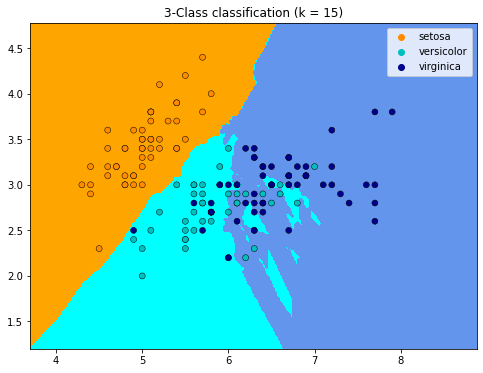

In [15]:
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(
    x=iris_X[:, 0],
    y=iris_X[:, 1],
    hue=data.target_names[iris_y],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(
    "3-Class classification (k = %i)" % (15)
)

## Use many models and compare

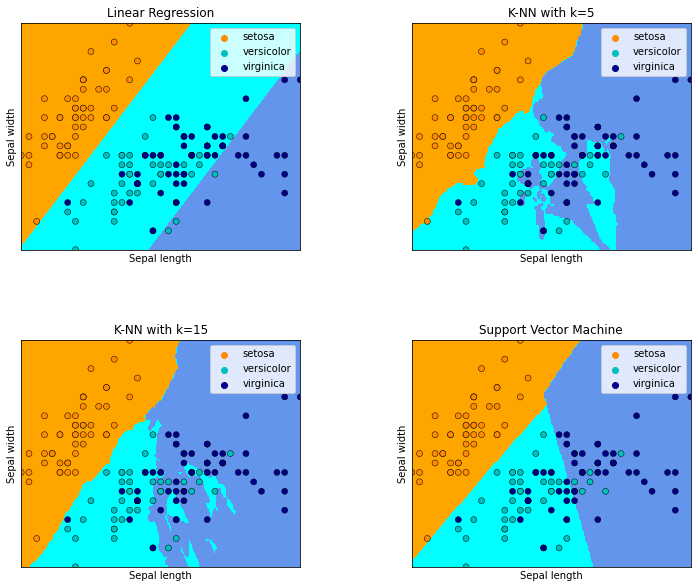

In [16]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return ax.contourf(xx, yy, Z, **params)

from sklearn import svm
models = (
    linear_model.LinearRegression(),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=15),
    svm.SVC(),
)

models = (clf.fit(X_train, y_train) for clf in models)
titles = (
    "Linear Regression",
    "K-NN with k=5",
    "K-NN with k=15",
    "Support Vector Machine",
)

fig, sub = plt.subplots(2, 2, figsize=(12,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = iris_X[:, 0], iris_X[:, 1]
xx, yy = np.meshgrid(
    np.arange(X0.min(), X0.max(), 0.02),
    np.arange(X1.min(), X1.max(), 0.02)
)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=cmap_light)
    sns.scatterplot(
        x=X0,
        y=X1,
        hue=data.target_names[iris_y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
        ax=ax
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()